In [5]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 3.7/390.3 MB 19.8 MB/s eta 0:00:20
    --------------------------------------- 6.6/390.3 MB 16.1 MB/s eta 0:00:24
    --------------------------------------- 9.2/390.3 MB 15.0 MB/s eta 0:00:26
   - -------------------------------------- 11.8/390.3 MB 14.5 MB/s eta 0:00:27
   - -------------------------------------- 14.2/390.3 MB 13.9 MB/s eta 0:00:28
   - -------------------------------------- 17.0/390.3 MB 13.8 MB/s eta 0:00:28
   -- ------------------------------------- 19.7/390.3 MB 13.5 MB/s eta 0:00:28
   -- ------------------------------------- 21.8/390.3 MB 13.1 MB/s eta 0:00:29
   -- ------------------------------------- 24.6/390.3 MB 13.5 MB/s eta 0:00:28
   -- ------------------------------------- 27.3/390.3 MB 13.3 MB/s eta 0:00:28
   --- ------------------------------------ 29.9/390.3 MB 13.3 MB/s eta 0:00:28
   --- ------------------------------------ 32.0/390

In [51]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

# Example directory setup
defective_path = r"C:\Users\balra\Desktop\Image Classification'\casting_512x512\casting_512x512\def_front"
non_defective_path = r"C:\Users\balra\Desktop\Image Classification'\casting_512x512\casting_512x512\ok_front"


In [53]:


def load_images(folder, defect_label, defect_type=None):
    images, labels, defect_types = [], [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(('.jpg', '.jpeg', '.png')):
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(defect_label)
            defect_types.append(defect_type)
    return images, labels, defect_types


#defective_images, defective_labels, defect_types = load_images(defective_path, label=1, defect_type="type_x")
#non_defective_images, non_defective_labels, _ = load_images(non_defective_path, label=0)



In [55]:
# Load data 
defective_images, defective_labels, defect_types = load_images(defective_path, defect_label=1, defect_type="type_x")
non_defective_images, non_defective_labels, _ = load_images(non_defective_path, defect_label=0)


In [56]:

# Combine 
all_images = np.array(defective_images + non_defective_images)
all_labels = np.array(defective_labels + non_defective_labels)
all_defect_types = defect_types  # Optional, if defect types are used


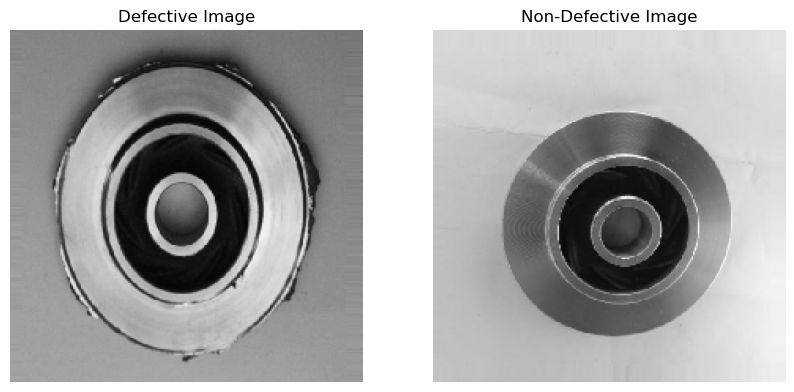

In [59]:

import matplotlib.pyplot as plt


# Function to display one defective and one non-defective image
def plot_images(defective_images, non_defective_images):
    # Select one defective image (random or the first one)
    defective_img = defective_images[0]
    # Select one non-defective image (random or the first one)
    non_defective_img = non_defective_images[0]  
    
    
    plt.figure(figsize=(10,5))

    # Defective Image
    plt.subplot(1, 2, 1)
    plt.imshow(defective_img)
    plt.axis('off')  # Hide axis
    plt.title('Defective Image')

    # Non-Defective Image
    plt.subplot(1, 2, 2)
    plt.imshow(non_defective_img)
    plt.axis('off')  # Hide axis
    plt.title('Non-Defective Image')

  
    plt.show()


plot_images(defective_images, non_defective_images)

In [61]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Set up ResNet50 with frozen layers for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False


In [63]:
# Add custom classifier layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [65]:
# Train-test split
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.25, random_state=42
)

In [67]:
# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)


In [ ]:

# Training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_generator, validation_data=(test_images, test_labels), epochs=20, callbacks=[early_stopping])


C:\Users\balra\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.5132 - loss: 4.7726 - val_accuracy: 0.6123 - val_loss: 0.6275
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.5792 - loss: 0.6631 - val_accuracy: 0.6185 - val_loss: 0.6203
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.5802 - loss: 0.6707 - val_accuracy: 0.6215 - val_loss: 0.6484
Epoch 4/20
 3/31 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6562 - loss: 0.6460 

11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
Classification Report:
               precision    recall  f1-score   support

Non-Defective       0.00      0.00      0.00       123
    Defective       0.62      1.00      0.77       202

     accuracy                           0.62       325
    macro avg       0.31      0.50      0.38       325
 weighted avg       0.39      0.62      0.48       325



C:\Users\balra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\balra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\balra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


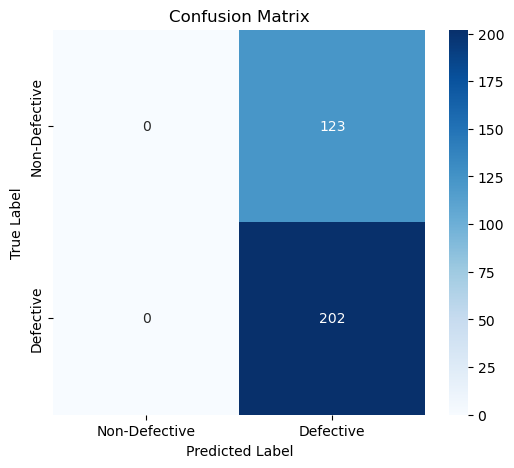

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Model predictions and evaluation metrics
test_predictions = model.predict(test_images)
test_predictions = np.round(test_predictions).flatten()

# Accuracy, precision, recall
print("Classification Report:")
print(classification_report(test_labels, test_predictions, target_names=['Non-Defective', 'Defective']))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Defective', 'Defective'], yticklabels=['Non-Defective', 'Defective'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
